# Análise de Dados A2 (trilha 3.2)

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, pearsonr
import seaborn as sns
import basedosdados as bd

In [7]:
df_ips = bd.read_table(dataset_id='br_rj_rio_de_janeiro_ipp_ips',
table_id='dimensoes_componentes',
billing_project_id="ps-analytica-379917")

Downloading: 100%|██████████| 99/99 [00:00<00:00, 275.51rows/s]


In [8]:
df_adh = bd.read_table(dataset_id='mundo_onu_adh',
table_id='brasil',
billing_project_id="ps-analytica-379917")

Downloading: 100%|██████████| 3/3 [00:00<00:00,  8.91rows/s]


In [9]:
df_adh_municipio = bd.read_table(dataset_id='mundo_onu_adh',
table_id='municipio',
billing_project_id="ps-analytica-379917")

Downloading: 100%|██████████| 16695/16695 [00:59<00:00, 282.74rows/s]


In [10]:
df_pib = bd.read_table(dataset_id='br_ibge_pib',
table_id='municipio',
billing_project_id="ps-analytica-379917")

Downloading: 100%|██████████| 105756/105756 [00:22<00:00, 4606.12rows/s]


## Introdução

### Proporção crianças pobres x educação

In [156]:
## Aqui buscamos explorar as relações entre os municípios mais pobres e seu IDHE

In [157]:
df_adh_municipio['prop_pobreza'].median()

38.45

In [112]:
municipios_mais_pobres = df_adh_municipio[df_adh_municipio['prop_pobreza'] > 38.45]
municipios_mais_pobres_1991 = municipios_mais_pobres[municipios_mais_pobres['ano'] == 1991]
municipios_mais_pobres_2000 = municipios_mais_pobres[municipios_mais_pobres['ano'] == 2000]
municipios_mais_pobres_2010 = municipios_mais_pobres[municipios_mais_pobres['ano'] == 2010]
municipios_mais_ricos = df_adh_municipio[df_adh_municipio['prop_pobreza'] < 38.45]
municipios_mais_ricos_1991 = municipios_mais_ricos[municipios_mais_ricos['ano'] == 1991]
municipios_mais_ricos_2000 = municipios_mais_ricos[municipios_mais_ricos['ano'] == 2000]
municipios_mais_ricos_2010 = municipios_mais_ricos[municipios_mais_ricos['ano'] == 2010]

In [40]:
df_adh_municipio['prop_pobreza_criancas'].median()

51.93

In [119]:
municipios_mais_criancas_pobres = df_adh_municipio[df_adh_municipio['prop_pobreza_criancas'] > 51.93]
municipios_mais_criancas_pobres_1991 = municipios_mais_criancas_pobres[municipios_mais_criancas_pobres['ano'] == 1991]
municipios_mais_criancas_pobres_2000 = municipios_mais_criancas_pobres[municipios_mais_criancas_pobres['ano'] == 2000]
municipios_mais_criancas_pobres_2010 = municipios_mais_criancas_pobres[municipios_mais_criancas_pobres['ano'] == 2010]
municipios_menos_criancas_pobres = df_adh_municipio[df_adh_municipio['prop_pobreza_criancas'] < 51.93]
municipios_menos_criancas_pobres_1991 = municipios_menos_criancas_pobres[municipios_menos_criancas_pobres['ano'] == 1991]
municipios_menos_criancas_pobres_2000 = municipios_menos_criancas_pobres[municipios_menos_criancas_pobres['ano'] == 2000]
municipios_menos_criancas_pobres_2010 = municipios_menos_criancas_pobres[municipios_menos_criancas_pobres['ano'] == 2010]

In [44]:
df_adh_municipio['idhm_e'].median()

0.361

### IDHE ao longo dos anos

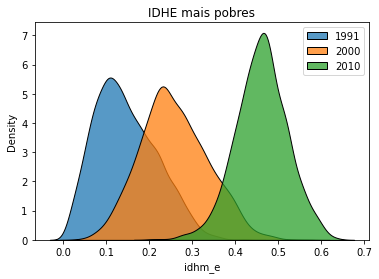

In [158]:
sns.kdeplot(municipios_mais_pobres_1991['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_mais_pobres_2000['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_mais_pobres_2010['idhm_e'],x='IDHE',multiple='stack')
plt.title("IDHE mais pobres")
plt.legend(['1991','2000','2010'])
plt.savefig('img/idhe1',dpi=200)
plt.show()

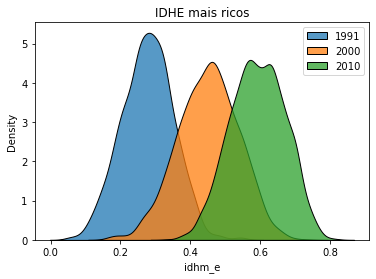

In [159]:
sns.kdeplot(municipios_mais_ricos_1991['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_mais_ricos_2000['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_mais_ricos_2010['idhm_e'],x='IDHE',multiple='stack')
plt.title("IDHE mais ricos")
plt.legend(['1991','2000','2010'])
plt.savefig('img/idhe2',dpi=200)
plt.show()

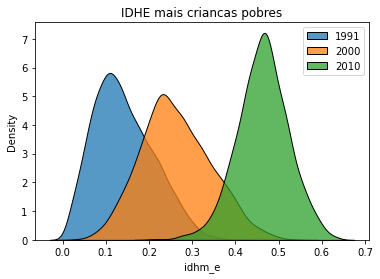

In [160]:
sns.kdeplot(municipios_mais_criancas_pobres_1991['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_mais_criancas_pobres_2000['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_mais_criancas_pobres_2010['idhm_e'],x='IDHE',multiple='stack')
plt.title("IDHE mais criancas pobres")
plt.legend(['1991','2000','2010'])
plt.savefig('img/idhe3',dpi=200)
plt.show()

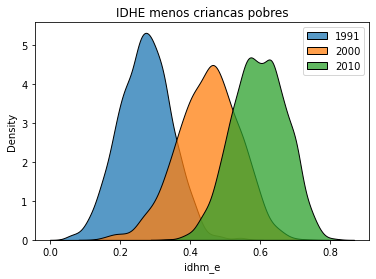

In [161]:
sns.kdeplot(municipios_menos_criancas_pobres_1991['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_menos_criancas_pobres_2000['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(municipios_menos_criancas_pobres_2010['idhm_e'],x='IDHE',multiple='stack')
plt.title("IDHE menos criancas pobres")
plt.legend(['1991','2000','2010'])
plt.savefig('img/idhe4',dpi=200)
plt.show()

## Rio de Janeiro


In [80]:
df_ips.head()

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,2016,Rio De Janeiro,60.77,75.84,70.19,83.68,78.16,71.34,53.28,49.96,50.89,62.03,50.26,53.20,61.46,54.82,64.14,32.36
1,2016,Portuaria,45.33,59.10,87.63,80.80,67.97,0.00,41.67,41.34,20.73,64.74,39.89,35.23,39.35,61.94,34.18,5.43
2,2016,Centro,57.75,62.43,59.38,74.18,91.85,24.31,52.41,55.60,56.00,41.04,56.99,58.42,45.89,87.27,52.24,48.26
3,2016,Rio Comprido,52.43,58.97,61.22,84.36,64.78,25.52,47.19,34.00,42.08,47.84,64.84,51.14,66.89,50.45,64.74,22.48
4,2016,Botafogo,87.12,93.32,85.15,98.49,99.55,90.08,81.13,78.47,86.52,81.46,78.07,86.91,68.19,85.74,94.30,99.39


In [111]:
adh_rj = df_adh_municipio[(df_adh_municipio['id_municipio'].astype(int)) > 3300000]
adh_rj = adh_rj[(adh_rj['id_municipio'].astype(int)) < 3400000]
adh_rj_1991 = adh_rj[adh_rj['ano'] == 1991]
adh_rj_2000 = adh_rj[adh_rj['ano'] == 2000]
adh_rj_2010 = adh_rj[adh_rj['ano'] == 2010]
print(adh_rj['idhm_e'].mean(),adh_rj_1991['idhm_e'].mean(),adh_rj_2000['idhm_e'].mean(),adh_rj_2010['idhm_e'].mean())

0.44831884057971016 0.27822826086956526 0.4458260869565217 0.6209021739130435


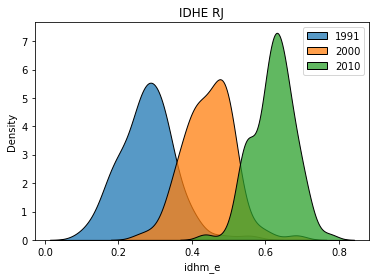

In [162]:
## IDHE do Rio ao longo do tempo
sns.kdeplot(adh_rj_1991['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(adh_rj_2000['idhm_e'],x='IDHE',multiple='stack')
sns.kdeplot(adh_rj_2010['idhm_e'],x='IDHE',multiple='stack')
plt.title("IDHE RJ")
plt.legend(['1991','2000','2010'])
plt.savefig('img/idhe5',dpi=200)
plt.show()

### Análise de Correlação

Coeficiente de correlação amostral entre os datasets: 0.5046718147139806


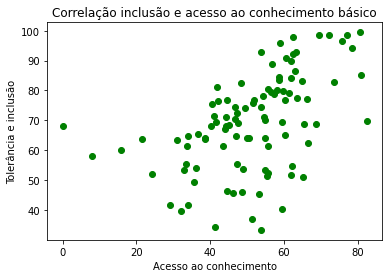

In [163]:
coeficiente = pearsonr(df_ips['acesso_conhecimento_basico'],df_ips['tolerancia_inclusao'])
print(f"Coeficiente de correlação amostral entre os datasets: {coeficiente[0]}")
    
plt.scatter(df_ips['acesso_conhecimento_basico'],df_ips['tolerancia_inclusao'],color='green')
plt.title('Correlação inclusão e acesso ao conhecimento básico')
plt.xlabel('Acesso ao conhecimento')
plt.ylabel('Tolerância e inclusão')
plt.savefig('img/tol1',dpi=200)
plt.show()

Coeficiente de correlação amostral entre os datasets: 0.7646381634790932


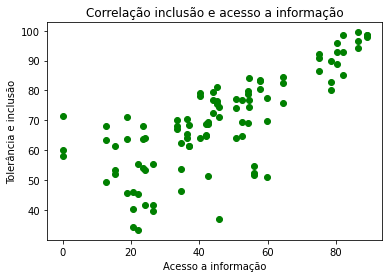

In [164]:
coeficiente = pearsonr(df_ips['acesso_informacao'],df_ips['tolerancia_inclusao'])
print(f"Coeficiente de correlação amostral entre os datasets: {coeficiente[0]}")
    
plt.scatter(df_ips['acesso_informacao'],df_ips['tolerancia_inclusao'],color='green')
plt.title('Correlação inclusão e acesso a informação')
plt.xlabel('Acesso a informação')
plt.ylabel('Tolerância e inclusão')
plt.savefig('img/tol2',dpi=200)
plt.show()

In [129]:
df_pib_rj = df_pib[(df_pib['id_municipio'].astype(int)) > 3300000]
df_pib_rj = df_pib_rj[(df_pib_rj['id_municipio'].astype(int)) < 3400000]

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
3172,3300100,2002,2296837098,544797852,1752039246,988658,640031343,778404266,323717057
3173,3300159,2002,5946625,2104999,57361251,2871805,4532795,30144673,19811979
3174,3300209,2002,544748152,29746441,515001712,20900886,85889779,216247346,191963701
3175,3300225,2002,90321757,10590251,79731506,94686,17157624,34871341,26755681
3176,3300233,2002,763413708,16735812,746677895,1932873,413175756,248885041,82684225
...,...,...,...,...,...,...,...,...,...
103448,3306008,2020,5347737551,704600852,4643136699,19553209,2057324024,1939492357,626767108
103449,3306107,2020,2249764739,246139909,200362483,51388157,448580781,94025225,563403642
103450,3306156,2020,247750143,51473766,196276377,31725834,13771346,54013528,96765669
103451,3306206,2020,1282391607,159133532,1123258075,31628106,19022658,587724451,313678937


### Valor adicionado bruto e IPS

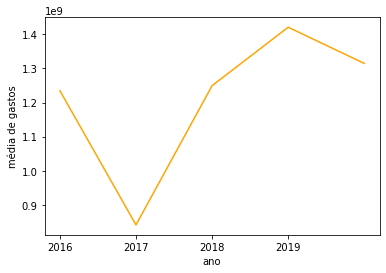

In [165]:
df_pib_rj_pos_2016 = df_pib_rj[df_pib_rj['ano'] >= 2016]
plt.plot(df_pib_rj_pos_2016.groupby('ano')['va_adespss'].mean(),color='orange')
plt.xticks(range(2016,2020,1))
plt.xlabel('ano')
plt.ylabel('média de gastos')
plt.savefig('img/pib1',dpi=200)
plt.show()

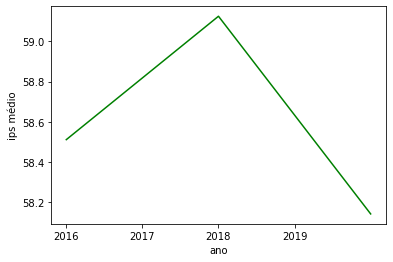

In [166]:
plt.plot(df_ips.groupby('ano')['ips_geral'].mean(),color='green')
plt.xticks(range(2016,2020,1))
plt.xlabel('ano')
plt.ylabel('ips médio')
plt.savefig('img/ips1',dpi=200)
plt.show()